In [569]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [571]:
hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
hitter3 = pd.read_csv('data/2014_hitter.csv')

# 데이터프레임 병합 
df = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
df.head()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN


In [572]:
# -------------
# 변수 선택
# -------------
X = df[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']].copy()
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


<Axes: >

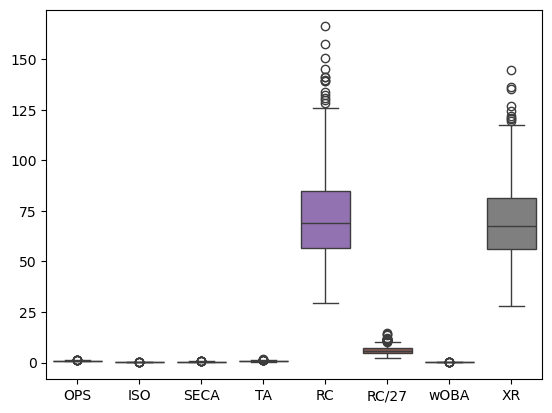

In [573]:
# -------------
# 데이터 분포 확인
# -------------
sns.boxplot(X)

In [574]:
# -------------
# 데이터 스케일링
# -------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133
...,...,...,...,...,...,...,...,...
644,0.412201,1.132233,1.026659,0.530672,-0.349031,0.204838,0.367294,-0.332603
645,-0.737598,-0.063556,-0.128516,-0.769272,-0.883686,-1.044144,-0.834318,-0.745176
646,-0.422330,-0.051699,0.773504,0.116640,-0.382668,-0.325418,-0.435385,-0.335978
647,-1.460858,-1.396013,-1.627267,-1.628601,-1.069759,-1.378851,-1.472888,-1.119570


In [575]:
X_scaled.describe()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02
mean,-1.012715e-16,-2.737068e-17,-1.642241e-16,3.174998e-16,1.806465e-16,-2.175969e-16,-1.231680e-15,1.696982e-16
std,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00
min,-2.221209e+00,-2.099251e+00,-2.174985e+00,-2.009087e+00,-1.949528e+00,-2.004141e+00,-2.325215e+00,-2.193504e+00
25%,-7.375979e-01,-7.734432e-01,-7.718542e-01,-7.457017e-01,-7.151492e-01,-6.870222e-01,-7.029325e-01,-7.094234e-01
50%,-6.997280e-02,-6.355581e-02,-1.276698e-01,-1.011109e-01,-1.746972e-01,-1.614607e-01,-4.306436e-02,-1.321170e-01
75%,5.791071e-01,6.334287e-01,6.420412e-01,5.614827e-01,5.425493e-01,5.014907e-01,6.150322e-01,6.076030e-01
max,3.574147e+00,3.734017e+00,4.905380e+00,4.583059e+00,4.212650e+00,4.696391e+00,3.503572e+00,3.953323e+00


<Axes: >

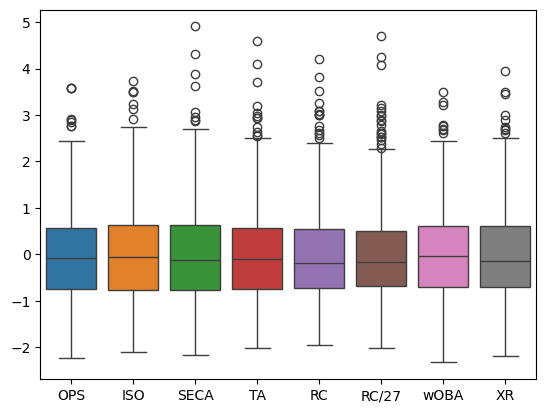

In [576]:
sns.boxplot(X_scaled)

# k-means clustering

### 최적의 k 찾기

In [577]:
# 엘보우 기법으로 최적의 k 찾기
from sklearn.cluster import KMeans
inertia = []
for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(X_scaled)
    print(km.inertia_)
    inertia.append(km.inertia_)

2225.953572555236
1335.4311472249058
1025.5621248743535
853.2066268786654
738.1526654441552


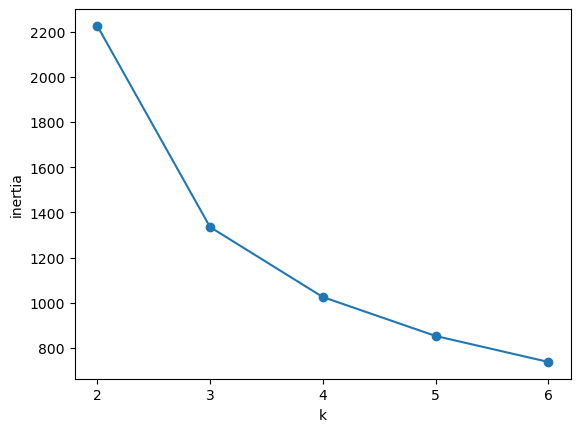

In [578]:
plt.plot(range(2,7), inertia, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [579]:
# ------------------
# 실루엣 계수로 찾기
# ------------------
from sklearn.metrics import silhouette_score
for k in range(2,7):
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    print(f'k:{k} ==> {score}')

k:2 ==> 0.47758360766113356
k:3 ==> 0.42554493249283115
k:4 ==> 0.3686437769255018
k:5 ==> 0.3121953864279591
k:6 ==> 0.28685363158672234


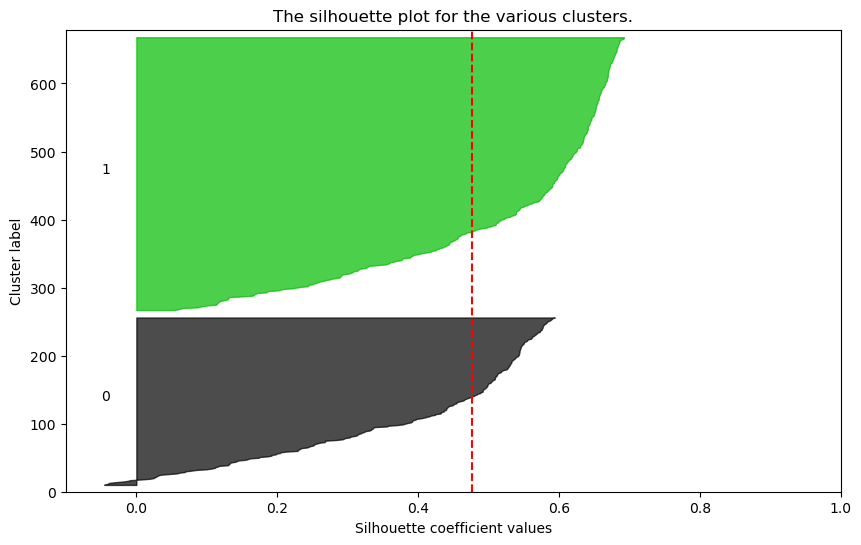

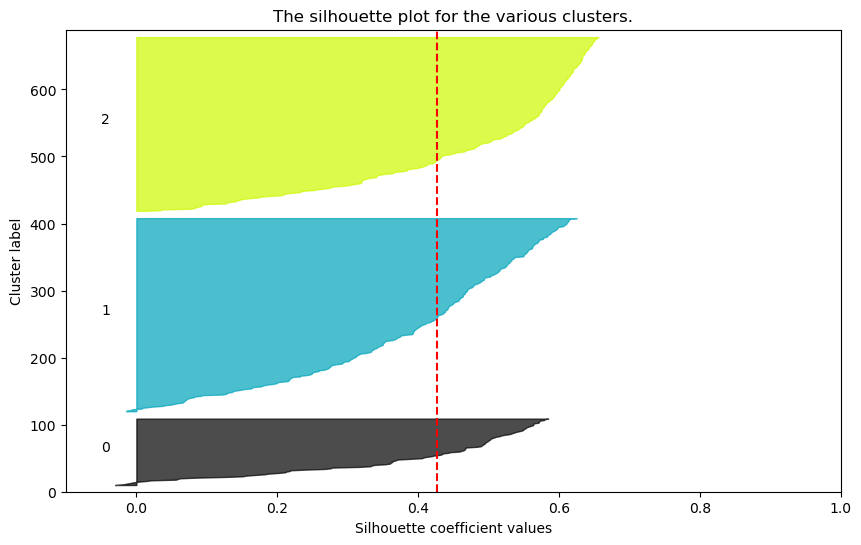

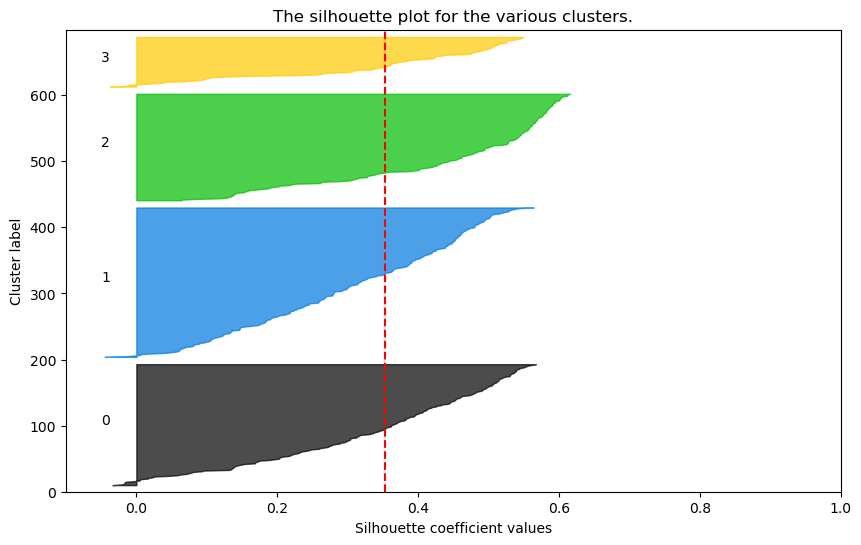

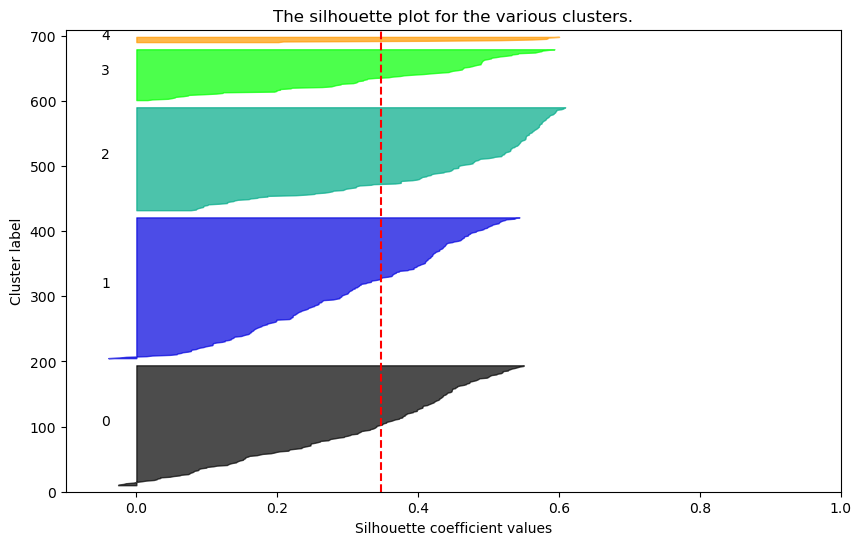

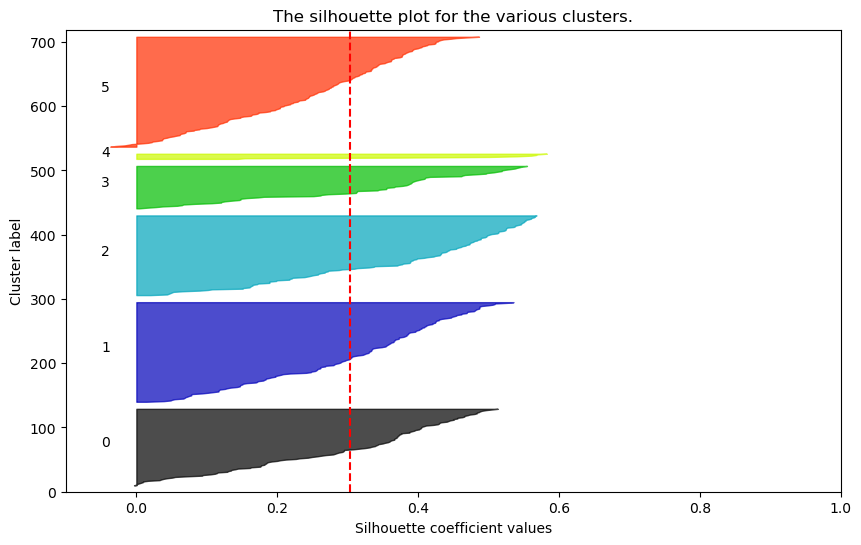

In [580]:
# ------------------
# 실루엣 그래프로 찾기
# ------------------
from silhouette_analysis import silhouette_plot
for k in range(2,7):
    silhouette_plot(X_scaled, k)

### 군집화

In [581]:
k = 3
# -----------------------
# k-means clustering
# -----------------------
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_scaled)
cluster = km.labels_

### 군집화 결과 분석

In [582]:
# -----------------------
# 데이터프레임 생성
# -----------------------
X['cluster'] = cluster
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,1
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,0
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,1
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,0
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,1


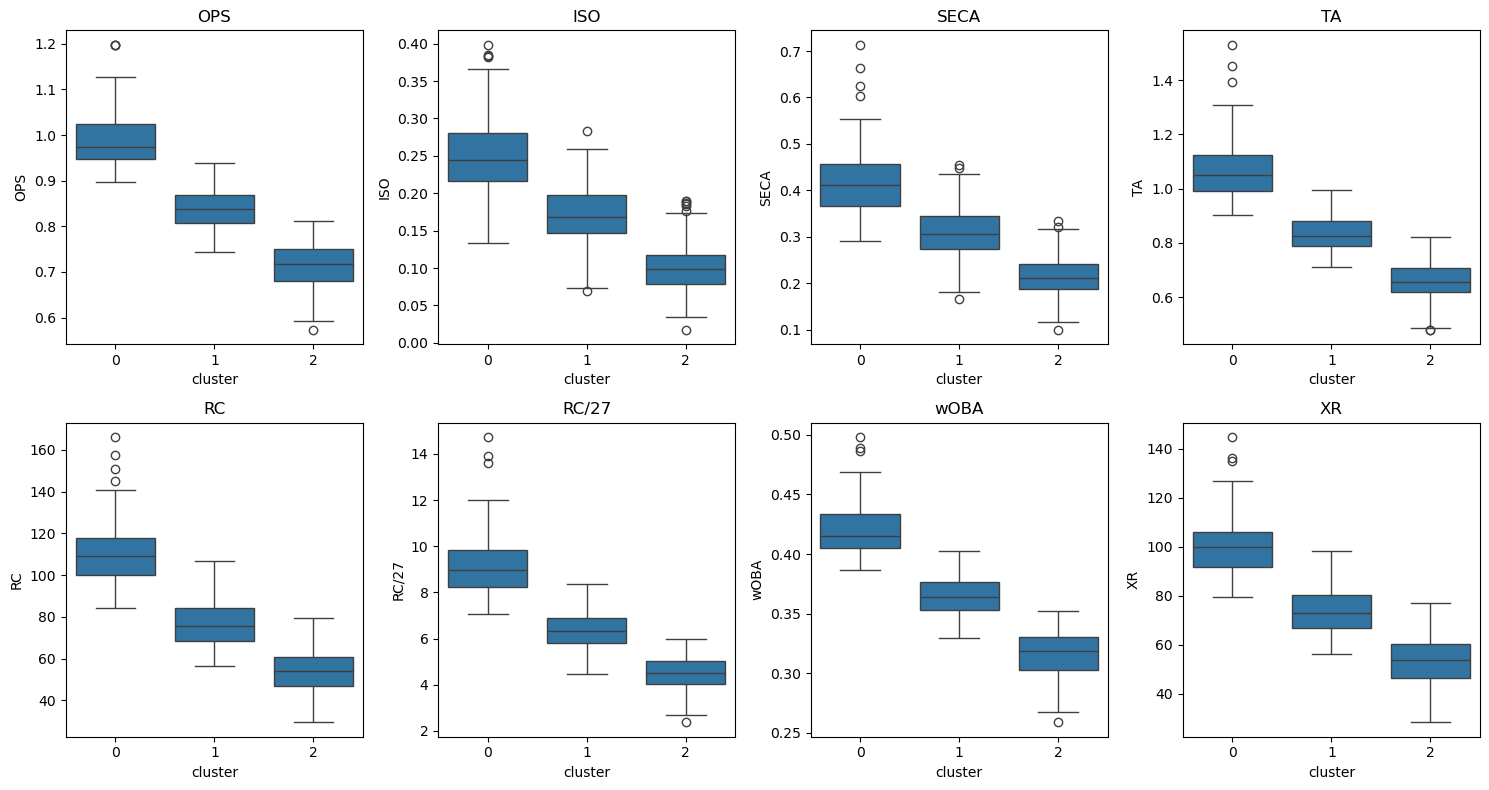

In [583]:
# 군집 결과 시각화

plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(x='cluster', y=col, data=X)
    plt.title(col)
plt.tight_layout()

### 선수이름 컬럼 추가

In [584]:
X['YrPlayer'] = df['YrPlayer'].copy()
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,YrPlayer
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,1,2000박종호
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,0,2000김동주
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,1,2000브리또
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,0,2000송지만
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,1,2000데이비스


### 잘못 군집화 된 데이터

In [587]:
from sklearn.metrics import silhouette_samples
X['silhouette'] = silhouette_samples(X_scaled, km.labels_)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,YrPlayer,silhouette
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,1,2000박종호,0.081953
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,0,2000김동주,0.563333
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,1,2000브리또,0.292713
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,0,2000송지만,0.584445
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,1,2000데이비스,0.306740


In [589]:
X.loc[X['silhouette']<0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,YrPlayer,silhouette
73,0.789227,0.152455,0.250646,0.748276,60.750345,5.560201,0.342842,59.566,1,2001신동주,-0.013725
117,0.781000,0.159722,0.263889,0.721212,63.720374,5.151048,0.339205,63.048,1,2002박재홍,-0.014669
170,0.943000,0.163366,0.331683,0.985765,92.067660,8.601477,0.408637,84.258,0,2004이진영,-0.030222
252,0.771000,0.142132,0.317259,0.751613,59.147646,5.118546,0.339771,59.008,1,2005양준혁,-0.005997
390,0.911000,0.195991,0.387528,0.966463,95.166352,7.670124,0.395223,88.612,0,2009강봉규,-0.004194
475,0.928000,0.215881,0.354839,0.989691,89.941066,7.833577,0.399892,84.974,0,2011최정,-0.008561
546,0.839000,0.106952,0.165775,0.757812,63.145736,6.582760,0.364080,58.330,1,2013이병규,-0.007312
552,0.940000,0.196970,0.338384,0.985965,89.012600,8.374008,0.409434,81.736,0,2013박석민,-0.014241
623,0.915000,0.249012,0.335968,0.903047,99.677190,7.414006,0.389411,93.514,0,2014이승엽,-0.018446


## 군집의 중심에 있는 선수

In [594]:
idx = X.groupby(by='cluster')['silhouette'].idxmax()
X.loc[idx]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,YrPlayer,silhouette
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,0,2000송지만,0.584445
224,0.864000,0.189055,0.313433,0.880546,75.843929,6.871765,0.370880,72.520,1,2005클리어,0.624981
84,0.696520,0.098485,0.207071,0.608974,48.227582,4.043928,0.312593,47.858,2,2001채종범,0.655743
